In [97]:
import pandas as pd
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [98]:
csv_file = "surveys.csv"
df = pd.read_csv(csv_file)

In [99]:
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


Eksik verilerin gözlenlenmesi

<Axes: >

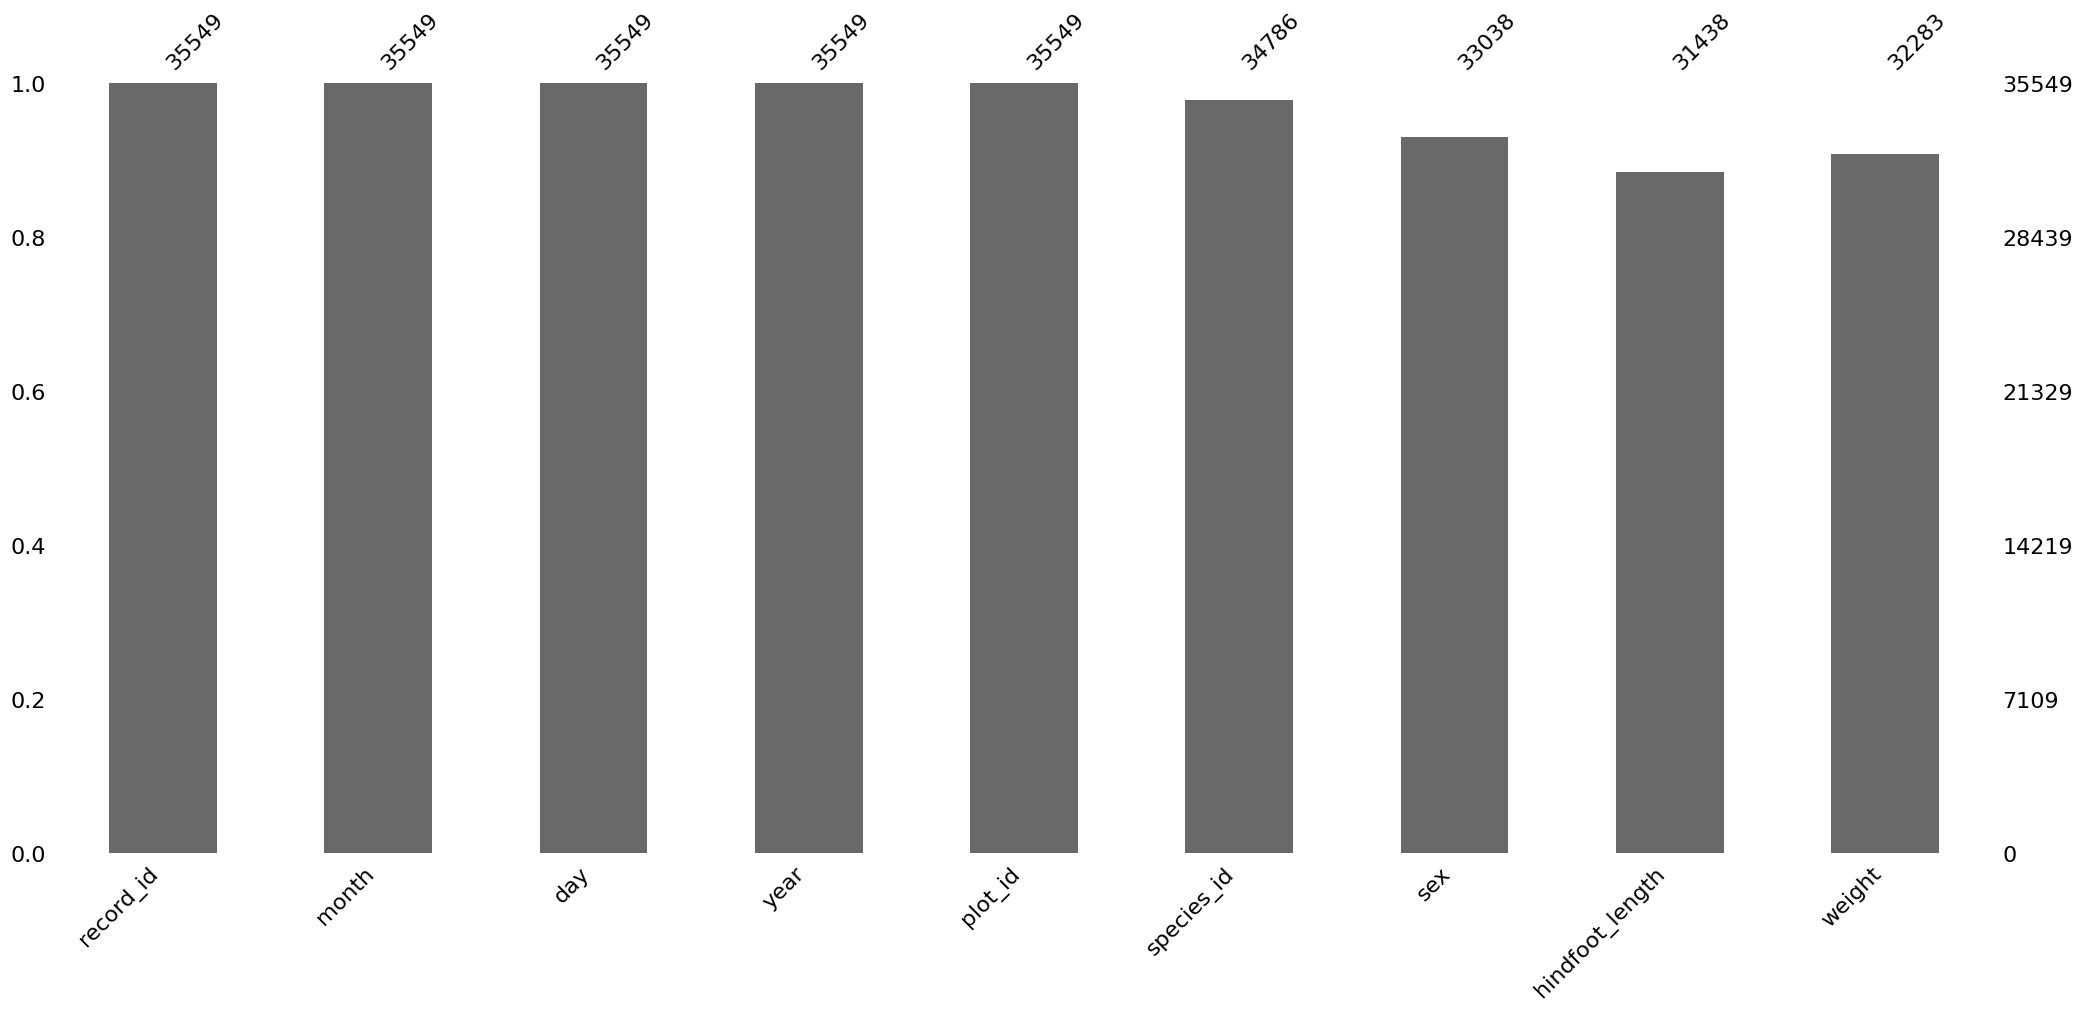

In [100]:
msno.bar(df)

<Axes: >

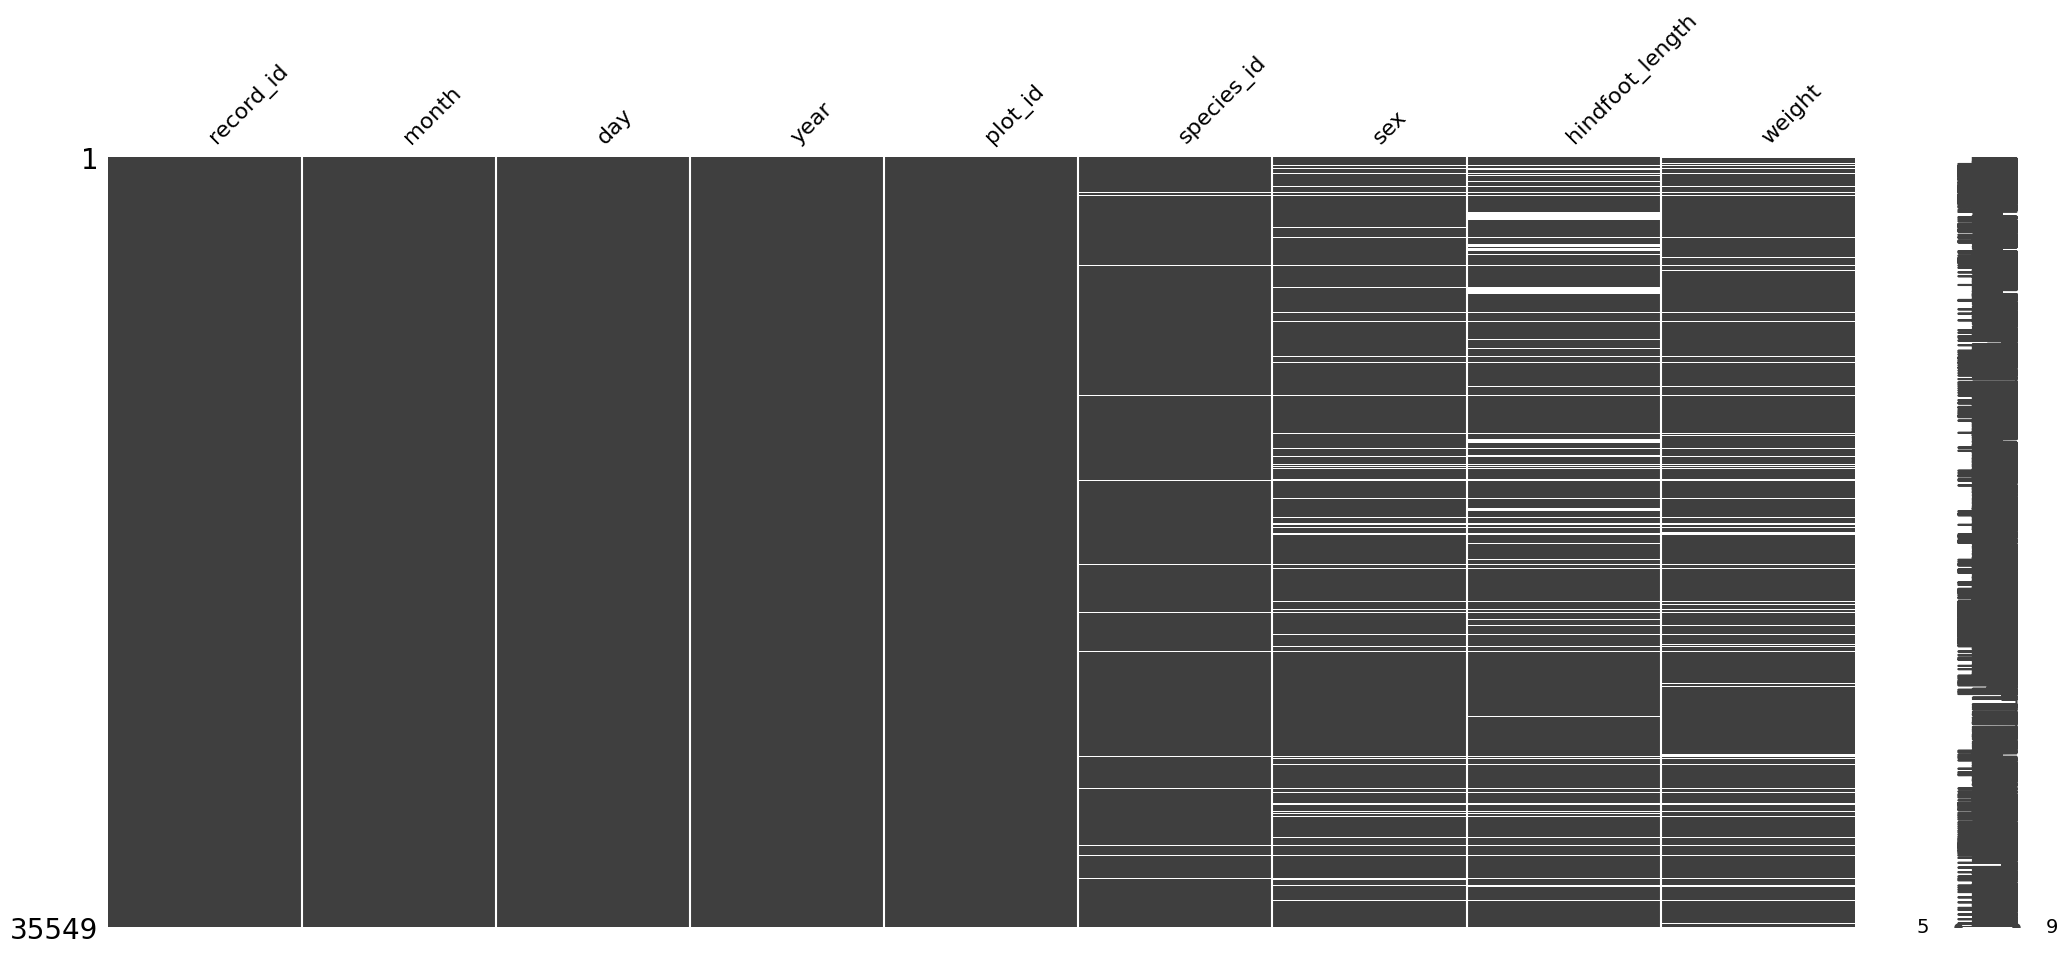

In [101]:
msno.matrix(df)

<Axes: >

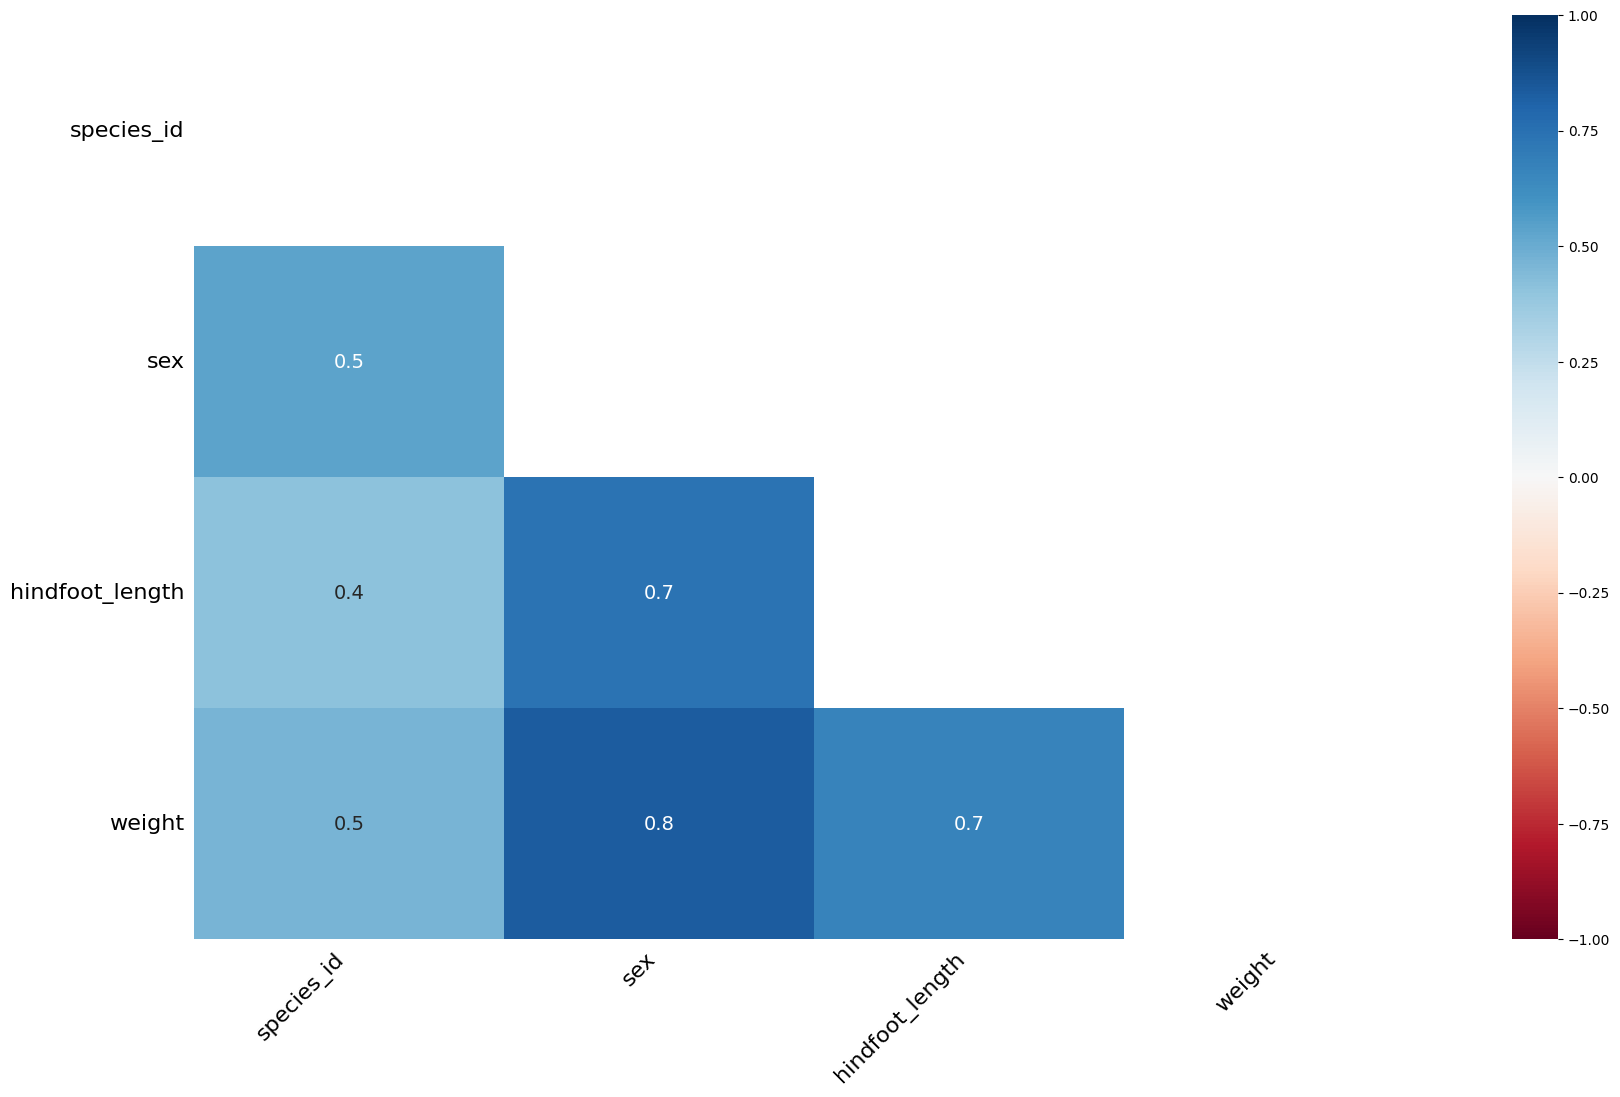

In [102]:
msno.heatmap(df)

<Axes: xlabel='sex'>

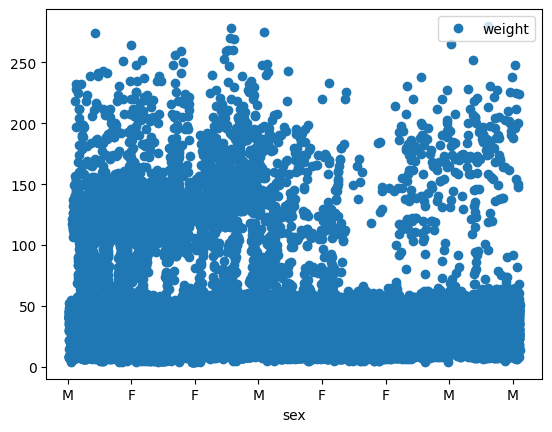

In [103]:
df.plot(x = "sex", y="weight", style='o')

Veri setini sayısallaştırma

In [104]:
# species_id sütunundaki farklı değerleri listeleyin
unique_species_ids = df['species_id'].unique()
print("Farklı species_id değerleri:", unique_species_ids)
print("Toplam farklı species_id sayısı:", len(unique_species_ids))

Farklı species_id değerleri: ['NL' 'DM' 'PF' 'PE' 'DS' 'PP' 'SH' 'OT' 'DO' 'OX' 'SS' 'OL' 'RM' nan 'SA'
 'PM' 'AH' 'DX' 'AB' 'CB' 'CM' 'CQ' 'RF' 'PC' 'PG' 'PH' 'PU' 'CV' 'UR'
 'UP' 'ZL' 'UL' 'CS' 'SC' 'BA' 'SF' 'RO' 'AS' 'SO' 'PI' 'ST' 'CU' 'SU'
 'RX' 'PB' 'PL' 'PX' 'CT' 'US']
Toplam farklı species_id sayısı: 49


In [105]:
from sklearn.preprocessing import LabelEncoder

# species_id sütunundaki kategorik değerleri sayısal hale getirme
le = LabelEncoder()
df['species_code'] = le.fit_transform(df['species_id'])

In [106]:
# Farklı sayısal kategorik değerleri listeleyin
unique_species_codes = df['species_code'].unique()
print("Farklı species_code değerleri:", unique_species_codes)
print("Toplam farklı species_code sayısı:", len(unique_species_codes))

Farklı species_code değerleri: [15 11 22 21 13 28 38 17 12 18 40 16 32 48 35 27  1 14  0  4  5  6 31 20
 23 24 29 10 45 44 47 43  7 36  3 37 33  2 39 25 41  9 42 34 19 26 30  8
 46]
Toplam farklı species_code sayısı: 49


In [107]:
print(df.head())

   record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   

   weight  species_code  
0     NaN            15  
1     NaN            15  
2     NaN            11  
3     NaN            11  
4     NaN            11  


In [108]:
# sex sütunundaki kategorik değerleri sayısal hale getirme
sex_mapping = {'M': 0, 'F': 1}
df['sex_code'] = df['sex'].map(sex_mapping)

In [109]:
# Farklı sayısal kategorik değerleri listeleyin
unique_sex_codes = df['sex_code'].unique()
print("Farklı sex_code değerleri:", unique_sex_codes)
print("Toplam farklı sex_code sayısı:", len(unique_sex_codes))

Farklı sex_code değerleri: [ 0.  1. nan]
Toplam farklı sex_code sayısı: 3


In [110]:
print(df.head())

   record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   

   weight  species_code  sex_code  
0     NaN            15       0.0  
1     NaN            15       0.0  
2     NaN            11       1.0  
3     NaN            11       0.0  
4     NaN            11       0.0  


In [111]:
configured_df = df[['record_id', 'month', 'day', 'year', 'plot_id', 
                    'hindfoot_length', 'weight', 'species_code', 'sex_code']]

Adım 1: Veri seti için en uygun k (komşuluk sayısı) değerini bul.

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
#bağımsız değişkenler (X) ve bağımlı değişken (y)
X = configured_df.dropna().drop('weight', axis =1)
y = configured_df.dropna()['weight']

In [114]:
#Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 42)

In [115]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [116]:
# Tek sayılarla sınırlı k değerlerini belirleme
k_values = range(1, 21, 2)

#Her bir K değeri için hata ölçümünü saklayacak bir liste
mse_values = []

In [117]:
#KNN modelini her bir K değeri için eğitime ve performansını ölçme
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

In [118]:
import matplotlib.pyplot as plt

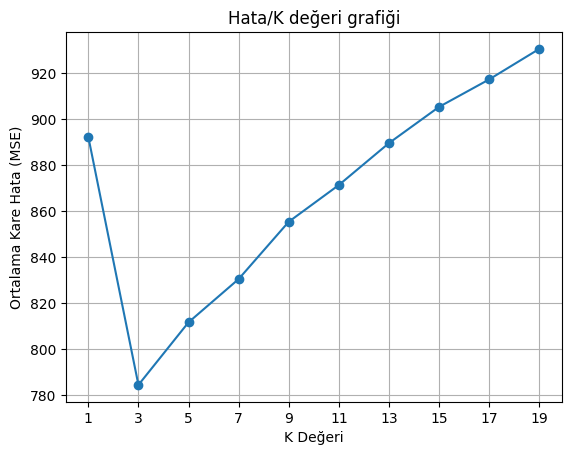

In [119]:
#Hata/K değeri grafiği
plt.plot(k_values, mse_values, marker='o', linestyle = '-')
plt.title('Hata/K değeri grafiği')
plt.xlabel('K Değeri')
plt.ylabel('Ortalama Kare Hata (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Adım 2: Eksik verilerin tamamlanması için alt veri seti oluşturma

In [120]:
# Eksik değerlerin bulunduğu sütunları belirleme
columns_with_missing_values = ['species_id', 'sex','species_code', 'sex_code', 'hindfoot_length', 'weight']

#Tüm sütunların listesi
all_columns = df.columns

#Eksik değerlerin bulunduğu sütunları hariç tutarak diğer sütunların listesini oluştur
non_missing_columns = [col for col in all_columns if col not in columns_with_missing_values]

#Yeni alt veri setini oluşturma
alt_df = df[non_missing_columns]

In [121]:
print(alt_df.head())

   record_id  month  day  year  plot_id
0          1      7   16  1977        2
1          2      7   16  1977        3
2          3      7   16  1977        2
3          4      7   16  1977        7
4          5      7   16  1977        3


In [122]:
from sklearn.impute import KNNImputer

#KNN modeli oluşturma
knn_imputer = KNNImputer(n_neighbors=3)

#Eksik olmayan sütunları seçin
X_train = alt_df[['record_id', 'month', 'day', 'year', 'plot_id']]

#KNN modelini eğit
knn_imputer.fit(X_train)

KNNImputer(n_neighbors=3)

In [123]:
X_train.head()

,record_id,month,day,year,plot_id
0,1,7,16,1977,2
1,2,7,16,1977,3
2,3,7,16,1977,2
3,4,7,16,1977,7
4,5,7,16,1977,3


In [126]:
configured_df.head()

,record_id,month,day,year,plot_id,hindfoot_length,weight,species_code,sex_code
0,1,7,16,1977,2,32.0,NaN,15,0.0
1,2,7,16,1977,3,33.0,NaN,15,0.0
2,3,7,16,1977,2,37.0,NaN,11,1.0
3,4,7,16,1977,7,36.0,NaN,11,0.0
4,5,7,16,1977,3,35.0,NaN,11,0.0


In [136]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=3)

X_train_columns = ['record_id', 'month', 'day', 'year', 'plot_id', 'species_code', 'sex_code']
X_train = configured_df[X_train_columns]

#KNN modelini oluşturme
knn.fit(X_train)

KNNImputer(n_neighbors=3)

In [137]:
# Eksik değerleri tamamlama
X_test_columns = ['hindfoot_length', 'sex_code', 'species_code', 'weight']
X_test = configured_df[X_test_columns]

# KNNImputer nesnesini oluşturma
knn_imputer = KNNImputer(n_neighbors=3)

# Eksik değerleri tahmin etme
imputed_values = knn_imputer.fit_transform(X_test)

# Tahmin edilen değerleri eksik olan sütuna yerleştirme
configured_df[['hindfoot_length', 'sex_code', 'species_code', 'weight']] = imputed_values

# Sonuçları kontrol etme
print(configured_df.head())


   record_id  month  day  year  plot_id  hindfoot_length      weight  \
0          1      7   16  1977        2             32.0  214.333333   
1          2      7   16  1977        3             33.0  213.333333   
2          3      7   16  1977        2             37.0   40.333333   
3          4      7   16  1977        7             36.0   41.333333   
4          5      7   16  1977        3             35.0   35.000000   

   species_code  sex_code  
0          15.0       0.0  
1          15.0       0.0  
2          11.0       1.0  
3          11.0       0.0  
4          11.0       0.0  


C:\Users\Irem\AppData\Local\Temp\ipykernel_26564\691044635.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  configured_df[['hindfoot_length', 'sex_code', 'species_code', 'weight']] = imputed_values


In [138]:
# Boş değerleri kontrol etme
missing_values = configured_df.head().isnull()

# Sonucu gösterme
print(missing_values)

   record_id  month    day   year  plot_id  hindfoot_length  weight  \
0      False  False  False  False    False            False   False   
1      False  False  False  False    False            False   False   
2      False  False  False  False    False            False   False   
3      False  False  False  False    False            False   False   
4      False  False  False  False    False            False   False   

   species_code  sex_code  
0         False     False  
1         False     False  
2         False     False  
3         False     False  
4         False     False  


In [139]:
# Boş değerleri kontrol etme
missing_values = configured_df.head().isnull()

# Boş değerlerin olup olmadığını kontrol etme
if missing_values.any().any():
    print("configured_df veri çerçevesinde boş değerler bulunuyor.")
else:
    print("configured_df veri çerçevesinde boş değerler bulunmuyor.")


configured_df veri çerçevesinde boş değerler bulunmuyor.


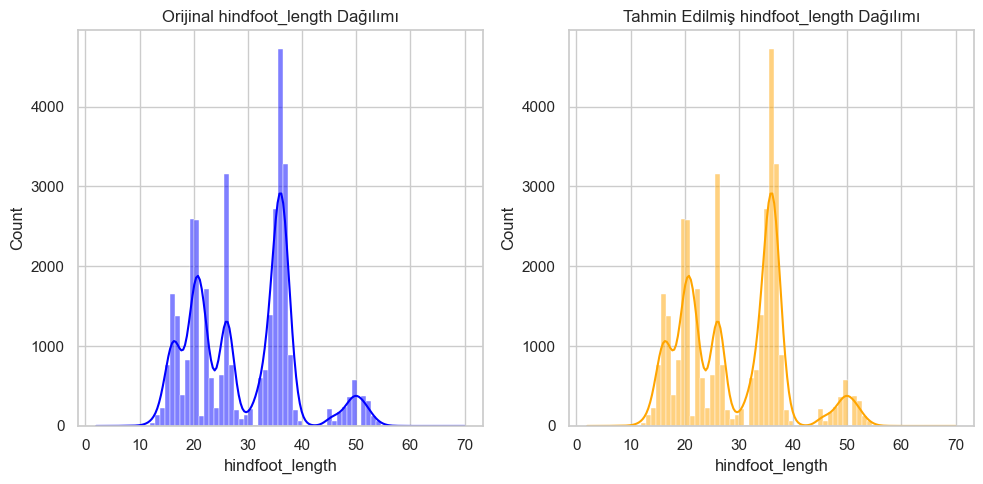

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tahmin edilmiş veri seti ile orijinal veri setini birleştirme
predicted_df = configured_df.copy()  # Tahmin edilmiş veri setini kopyalama
predicted_df[['hindfoot_length', 'sex_code', 'species_code', 'weight']] = imputed_values  # Tahmin edilen değerleri yerleştirme

# Görselleştirme
sns.set(style="whitegrid")  # Stil ayarı

# Orjinal hindfoot_length dağılımı
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=configured_df, x='hindfoot_length', kde=True, color='blue')
plt.title('Orijinal hindfoot_length Dağılımı')

# Tahmin edilmiş hindfoot_length dağılımı
plt.subplot(1, 2, 2)
sns.histplot(data=predicted_df, x='hindfoot_length', kde=True, color='orange')
plt.title('Tahmin Edilmiş hindfoot_length Dağılımı')

plt.tight_layout()
plt.show()


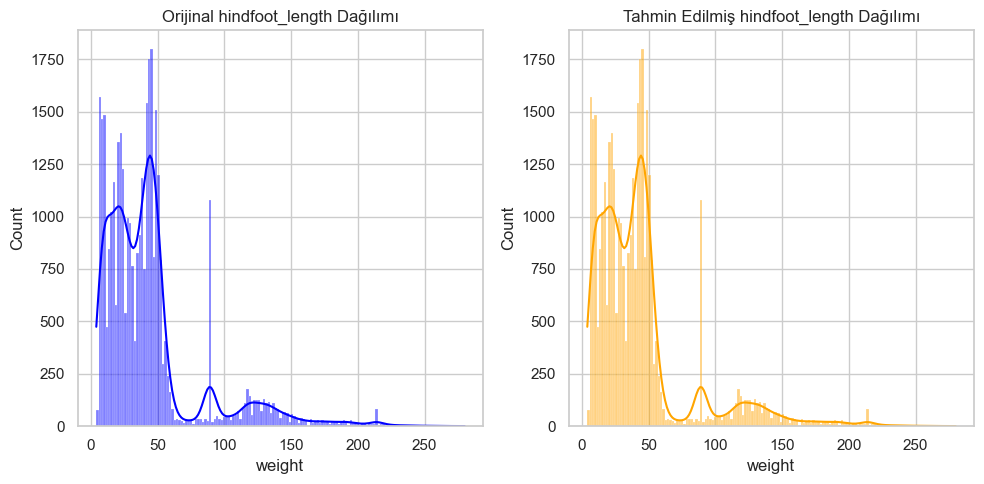

In [141]:
# Tahmin edilmiş veri seti ile orijinal veri setini birleştirme
predicted_df = configured_df.copy()  # Tahmin edilmiş veri setini kopyalama
predicted_df[['hindfoot_length', 'sex_code', 'species_code', 'weight']] = imputed_values  # Tahmin edilen değerleri yerleştirme

# Görselleştirme
sns.set(style="whitegrid")  # Stil ayarı

# Orjinal hindfoot_length dağılımı
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=configured_df, x='weight', kde=True, color='blue')
plt.title('Orijinal hindfoot_length Dağılımı')

# Tahmin edilmiş hindfoot_length dağılımı
plt.subplot(1, 2, 2)
sns.histplot(data=predicted_df, x='weight', kde=True, color='orange')
plt.title('Tahmin Edilmiş hindfoot_length Dağılımı')

plt.tight_layout()
plt.show()

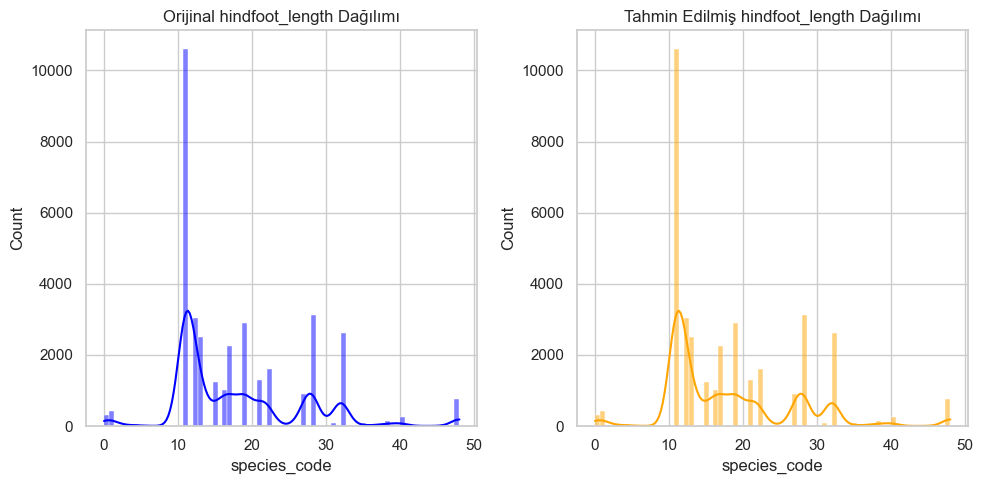

In [142]:
# Tahmin edilmiş veri seti ile orijinal veri setini birleştirme
predicted_df = configured_df.copy()  # Tahmin edilmiş veri setini kopyalama
predicted_df[['hindfoot_length', 'sex_code', 'species_code', 'weight']] = imputed_values  # Tahmin edilen değerleri yerleştirme

# Görselleştirme
sns.set(style="whitegrid")  # Stil ayarı

# Orjinal hindfoot_length dağılımı
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=configured_df, x='species_code', kde=True, color='blue')
plt.title('Orijinal hindfoot_length Dağılımı')

# Tahmin edilmiş hindfoot_length dağılımı
plt.subplot(1, 2, 2)
sns.histplot(data=predicted_df, x='species_code', kde=True, color='orange')
plt.title('Tahmin Edilmiş hindfoot_length Dağılımı')

plt.tight_layout()
plt.show()

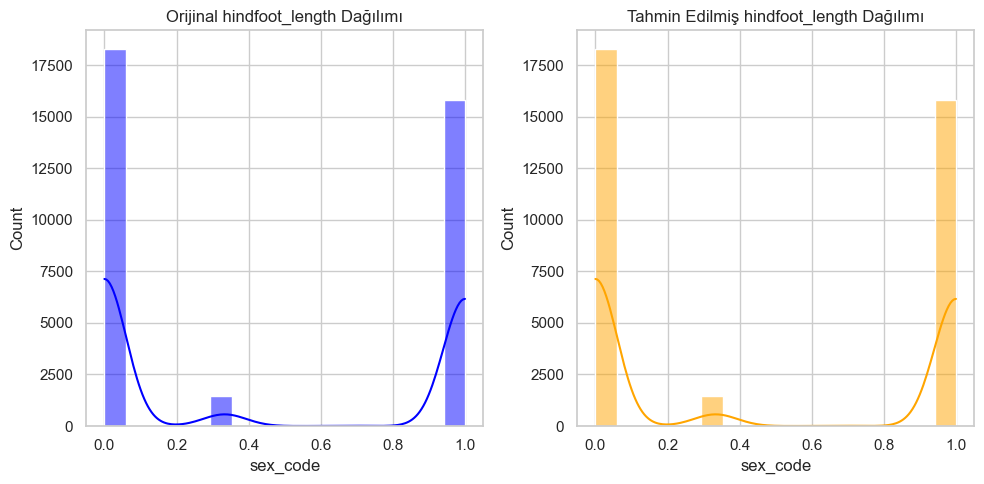

In [143]:
# Tahmin edilmiş veri seti ile orijinal veri setini birleştirme
predicted_df = configured_df.copy()  # Tahmin edilmiş veri setini kopyalama
predicted_df[['hindfoot_length', 'sex_code', 'species_code', 'weight']] = imputed_values  # Tahmin edilen değerleri yerleştirme

# Görselleştirme
sns.set(style="whitegrid")  # Stil ayarı

# Orjinal hindfoot_length dağılımı
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=configured_df, x='sex_code', kde=True, color='blue')
plt.title('Orijinal hindfoot_length Dağılımı')

# Tahmin edilmiş hindfoot_length dağılımı
plt.subplot(1, 2, 2)
sns.histplot(data=predicted_df, x='sex_code', kde=True, color='orange')
plt.title('Tahmin Edilmiş hindfoot_length Dağılımı')

plt.tight_layout()
plt.show()